In [14]:
import pandas as pd
import numpy as np
import requests 
import os
import csv
import json as jsn
from pprint import pprint
from scipy import stats
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [40]:
# File to Load, read, store
narrowed_data_to_load = "Resources/narrowed.csv"
narrowed_data = pd.read_csv(narrowed_data_to_load)
merged_data_to_load = "Resources/merged.csv"
merged_data = pd.read_csv(merged_data_to_load)
income_data_to_load = "Resources/merged.csv"
income_data = pd.read_csv(income_data_to_load)

In [45]:
# narrowed_data.head()
income_data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
NaN,OBJECTID_x,FIPS,TRACT_NAME,COUNTY_NAME,DIABETES_ADJRATE,DIABETES_L95CI,DIABETES_U95CI,DIABETES_STATEADJRATE,DIABETES_SL95CI,DIABETES_SU95CI,DIABETES_DISPLAY,OBJECTID_y,Census_Tract_Name,County_Name,Adult_Population_Age18_and_over,Health_Statistics_Region,Diabetes_Census_Tract_Estimate,Diabetes_Estimate_Confidence_Interval,Diabetes_Map_Symbol_withinHSR,Diabetes_County_Regional_Estimate,Diabetes_Map_Symbol_State,Diabetes_State_Estimate,OBJECTID,Tract_Name,Tract_FIPS,County_x,Population_Total,Population_Density_PerLandSquareMile,Percent_Poverty_AllPeople_Income_Below_Pov_Level,Poverty_Median_Household_Income,Poverty_Mean_Household_Income,Poverty_Per_Capita_Income,OBJECTID_1,State,County_y,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,HUNVFlag,GroupQuartersFlag,OHU2010,NUMGQTRS,PCTGQTRS,LowIncomeTracts,POP2010,UATYP10,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lahunvhalf,lahunvhalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
0,1,8043979000,"Census Tract 9790, Fremont County, Colorado",FREMONT,716.97,569.52,864.42,1267.78,1263.64,1271.91,Lower Than State Average,1,"Census Tract 9790, Fremont County, Colorado",Fremont,2994,13,10.0,95% C.I.: 9.2 - 11,Fourth Quintile,County/Regional Estimate 9.2% (95% C.I.: 6.9 - 11.5),Highest Quintile,State Estimate 7.0% (95% C.I.: 6.8 - 7.3),1,"Census Tract 9790, Fremont County, Colorado",8043979000,FREMONT,3471,3.4,9.7,49483.0,61677.0,29749,1,CO,Fremont,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,1649,0.0,0.0,1,3462,R,3462.000015,100.0000004,1027.033838,29.665910999999998,460.0000009,100.0000002,849.0000029999999,100.0000004,22.021600399999997,1.3354518,3462.000015,100.0000004,1027.033838,29.665910999999998,460.0000009,100.0000002,849.0000029999999,100.0000004,22.021600399999997,1.3354518,171.0728523,4.9414457999999994,48.53471354,1.4019270000000001,25.98258965,5.648389099999999,42.21517165,4.9723406,0.0,0.0
1,2,8045951600,"Census Tract 9516, Garfield County, Colorado",GARFIELD,602.99,495.07,710.91,1267.78,1263.64,1271.91,Lower Than State Average,2,"Census Tract 9516, Garfield County, Colorado",Garfield,2800,12,5.0,95% C.I.: 4.5 - 5.7,Fourth Quintile,County/Regional Estimate 5.1% (95% C.I.: 3 - 7.3),Second Quintile,State Estimate 7.0% (95% C.I.: 6.8 - 7.3),2,"Census Tract 9516, Garfield County, Colorado",8045951600,GARFIELD,3656,6.4,14.5,59154.0,82512.0,32362,2,CO,Garfield,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1425,6.0,0.0015337,0,3912,R,3722.6409740000004,95.15953409999999,723.9726764,18.506459,997.3040241,97.583564,280.22566739999996,92.4837186,27.13832204,1.9044436999999999,3635.8576329999996,92.941146,715.2333921000001,18.2830622,980.6032991000001,95.94944220000001,268.50096030000003,88.61417829999999,23.90085488,1.6772529999999999,13.20827418,0.3376348,1.711024451,0.04373780000000001,1.39034462,0.1360415,1.39034462,0.4588596,0.0,0.0
2,3,8069002803,"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.0,0.0,0.0,1267.78,1263.64,1271.91,No Events or Data Suppressed,3,"Census Tract 28.03, Larimer County, Colorado",Larimer,97,2,1.6,95% C.I.: 1.5 - 1.7,Lowest Quintile,County/Regional Estimate 5.1% (95% C.I.: 4.2 - 5.9),Lowest Quintile,State Estimate 7.0% (95% C.I.: 6.8 - 7.3),3,"Census Tract 28.03, Larimer County, Colorado",8069002803,LARIMER,97,0.4,38.1,43882.0,41385.0,27278,3,CO,Larimer,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,47,0.0,0.0,0,92,R,91.9999987,99.9999986,0.0,0.0,18.99999975,99.9999987,6.000000056,100.0000009,0.0,0.0,77.40769321,84.138797,0.0,0.0,17.69968278,93.15622509999999,5.993884508,99.8980751,0.0,0.0,0.0,0.0,0.0,0.

In [17]:
avg_rate = narrowed_data["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in census tracts is: {avg_rate}.")


The estimated average diabetes diagnosis rate for adults in census tracts is: 7.018648208469058.


In [18]:
# plt.scatter(
#     x_value,
#     y_value,
#     marker='o',
#     facecolors='lightblue',
#     edgecolors='black'
#             )
# #regression line in yellow 
# plt.plot(x_value,regress_values,'y-')

In [19]:
adult_over_18= narrowed_data["Adult_Pop_Over_18"].mean()
# print(f"The average diabetes rate for highinc census tracts is: {Adult_Pop_Over_18}.")
# pop_total=
# county=
# diabetes_adj_rate=
# diabetes_state_rate=
# narrowed_diab_highinc = narrowed_diab_df[narrowed_diab_df["Low_Income_Tract"]== 0]
# ct_highinc_count = narrowed_diab_highinc["County"].count()
# print(f"There are {ct_highinc_count} Colorado census tracts designated as highinc.")
# ct_highinc_sum = narrowed_diab_highinc["Pop_Total"].sum()
# print(f"There are {ct_highinc_sum} people living in highinc census tracts in Colorado.")
# ct_highinc_per_cap = narrowed_diab_highinc["Per_Capita_Income"].mean()
# print(f"The average per capita income is {ct_highinc_per_cap} for these census tracts.")
# avg_diab_highinc = narrowed_diab_highinc["Census_Tract_Estimate"].mean()
# print(f"The average diabetes rate for highinc census tracts is: {avg_diab_highinc}.")
# avg_hosp_highinc = narrowed_diab_highinc["Hospitalization_Census_Tract_Rate_per_100,000"].mean()

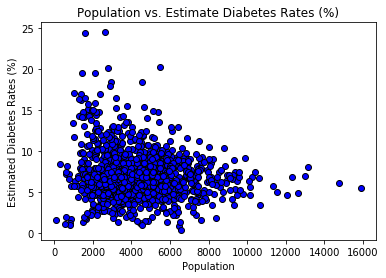

In [20]:
total_pop = narrowed_data["Pop_Total"]
diab_rate = narrowed_data["Census_Tract_Estimate"]
plt.scatter(total_pop,diab_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Population vs. Estimate Diabetes Rates (%)")
plt.xlabel("Population")
plt.ylabel("Estimated Diabetes Rates (%)")
plt.show()

In [21]:
# la_people_1=merged_data["lapop1"]
# la_children_1=merged_data["lakids1"]
# la_seniors_1=merged_data["laseniors1"]
# county=merged_data["COUNTY_NAME"]
# x_value,=la_people_1
# y_value,=la_children_1
# marker='o',
# facecolors='lightblue',
# plt.plot(x-value,y-value,marker='o',color='lightblue')
# plt.show()

In [22]:
# x_values = narrowed_diab_rural['LILATracts_halfAnd10']
# y_values = narrowed_diab_rural['Census_Tract_Estimate']
# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")
# plt.xlabel('LILATracts_halfAnd10')
# plt.ylabel('Census_Tract_Estimate')
# plt.title('LILATracts_half by Census_Tract_Estimate')
# correlation = st.pearsonr(x_values, y_values)
# print(f"The correlation between both factors is {round(correlation[0],2)}")
# plt.show()

In [42]:
# print(narrowed_data.dtypes)
print(income_data.dtypes)
# merged_data.options.display.max_columns = None
# print(merged_data.columns.values)
# print(merged_data.columns.tolist())
# merged_data.feature_names

<<<<<<< HEAD    object
dtype: object


In [23]:
x_values = merged_data["lapop1"]
y_values = merged_data["lakids1"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('lapop1')
plt.ylabel('lakids1')
plt.title('Low access people vs. low access kids')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

KeyError: 'lapop1'

In [ ]:
# # Plot the world average as a line chart
# la_people, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# # Plot the unemployment values for a single country
# country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
#                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# # Create a legend for our chart
# plt.legend(handles=[world_avg, country_one], loc="best")

# # Show the chart
# plt.show()

In [5]:
merged_data.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,<<<<<<< HEAD
NaN,OBJECTID_x,FIPS,TRACT_NAME,COUNTY_NAME,DIABETES_ADJRATE,DIABETES_L95CI,DIABETES_U95CI,DIABETES_STATEADJRATE,DIABETES_SL95CI,DIABETES_SU95CI,DIABETES_DISPLAY,OBJECTID_y,Census_Tract_Name,County_Name,Adult_Population_Age18_and_over,Health_Statistics_Region,Diabetes_Census_Tract_Estimate,Diabetes_Estimate_Confidence_Interval,Diabetes_Map_Symbol_withinHSR,Diabetes_County_Regional_Estimate,Diabetes_Map_Symbol_State,Diabetes_State_Estimate,OBJECTID,Tract_Name,Tract_FIPS,County_x,Population_Total,Population_Density_PerLandSquareMile,Percent_Poverty_AllPeople_Income_Below_Pov_Level,Poverty_Median_Household_Income,Poverty_Mean_Household_Income,Poverty_Per_Capita_Income,OBJECTID_1,State,County_y,LILATracts_1And10,LILATracts_halfAnd10,LILATracts_1And20,LILATracts_Vehicle,Urban,Rural,LA1and10,LAhalfand10,LA1and20,LATracts_half,LATracts1,LATracts10,LATracts20,LATractsVehicle_20,HUNVFlag,GroupQuartersFlag,OHU2010,NUMGQTRS,PCTGQTRS,LowIncomeTracts,POP2010,UATYP10,lapophalf,lapophalfshare,lalowihalf,lalowihalfshare,lakidshalf,lakidshalfshare,laseniorshalf,laseniorshalfshare,lahunvhalf,lahunvhalfshare,lapop1,lapop1share,lalowi1,lalowi1share,lakids1,lakids1share,laseniors1,laseniors1share,lahunv1,lahunv1share,lapop20,lapop20share,lalowi20,lalowi20share,lakids20,lakids20share,laseniors20,laseniors20share,lahunv20,lahunv20share
0,1,8043979000,"Census Tract 9790, Fremont County, Colorado",FREMONT,716.97,569.52,864.42,1267.78,1263.64,1271.91,Lower Than State Average,1,"Census Tract 9790, Fremont County, Colorado",Fremont,2994,13,10.0,95% C.I.: 9.2 - 11,Fourth Quintile,County/Regional Estimate 9.2% (95% C.I.: 6.9 - 11.5),Highest Quintile,State Estimate 7.0% (95% C.I.: 6.8 - 7.3),1,"Census Tract 9790, Fremont County, Colorado",8043979000,FREMONT,3471,3.4,9.7,49483.0,61677.0,29749,1,CO,Fremont,1,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,1649,0.0,0.0,1,3462,R,3462.000015,100.0000004,1027.033838,29.665910999999998,460.0000009,100.0000002,849.0000029999999,100.0000004,22.021600399999997,1.3354518,3462.000015,100.0000004,1027.033838,29.665910999999998,460.0000009,100.0000002,849.0000029999999,100.0000004,22.021600399999997,1.3354518,171.0728523,4.9414457999999994,48.53471354,1.4019270000000001,25.98258965,5.648389099999999,42.21517165,4.9723406,0.0,0.0
1,2,8045951600,"Census Tract 9516, Garfield County, Colorado",GARFIELD,602.99,495.07,710.91,1267.78,1263.64,1271.91,Lower Than State Average,2,"Census Tract 9516, Garfield County, Colorado",Garfield,2800,12,5.0,95% C.I.: 4.5 - 5.7,Fourth Quintile,County/Regional Estimate 5.1% (95% C.I.: 3 - 7.3),Second Quintile,State Estimate 7.0% (95% C.I.: 6.8 - 7.3),2,"Census Tract 9516, Garfield County, Colorado",8045951600,GARFIELD,3656,6.4,14.5,59154.0,82512.0,32362,2,CO,Garfield,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1425,6.0,0.0015337,0,3912,R,3722.6409740000004,95.15953409999999,723.9726764,18.506459,997.3040241,97.583564,280.22566739999996,92.4837186,27.13832204,1.9044436999999999,3635.8576329999996,92.941146,715.2333921000001,18.2830622,980.6032991000001,95.94944220000001,268.50096030000003,88.61417829999999,23.90085488,1.6772529999999999,13.20827418,0.3376348,1.711024451,0.04373780000000001,1.39034462,0.1360415,1.39034462,0.4588596,0.0,0.0
2,3,8069002803,"Census Tract 28.03, Larimer County, Colorado",LARIMER,0.0,0.0,0.0,1267.78,1263.64,1271.91,No Events or Data Suppressed,3,"Census Tract 28.03, Larimer County, Colorado",Larimer,97,2,1.6,95% C.I.: 1.5 - 1.7,Lowest Quintile,County/Regional Estimate 5.1% (95% C.I.: 4.2 - 5.9),Lowest Quintile,State Estimate 7.0% (95% C.I.: 6.8 - 7.3),3,"Census Tract 28.03, Larimer County, Colorado",8069002803,LARIMER,97,0.4,38.1,43882.0,41385.0,27278,3,CO,Larimer,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,47,0.0,0.0,0,92,R,91.9999987,99.9999986,0.0,0.0,18.99999975,99.9999987,6.000000056,100.0000009,0.0,0.0,77.40769321,84.138797,0.0,0.0,17.69968278,93.15622509999999,5.993884508,99.8980751,0.0,0.0,0.0,0.0,0.0,0.

interest variables: population total, diabetes state estimate,adult population 18 and over, diabetes adjrate

search for lakidshalf,lakidshalfshare,laseniorhalf,laseniorshare,lakids1,laseniors1

Population data, including age, race, Hispanic ethnicity, and residence in group quarters, are from the 2010 Census of the Population and downloaded at the census-block level before being allocated to ½-kilometer-square grid cells. Urban or rural designation was also provided by the 2010 Census at the block level. Data on income, vehicle availability, and SNAP participation are from the 2010-14 American Community Survey and were downloaded at the block-group level (income and vehicle availability) and tract level (SNAP participation) for assignment to ½-kilometer-square grid cells.

Two 2015 lists of supermarkets, supercenters, and large grocery stores were combined to produce a comprehensive list of stores that represent sources of affordable and nutritious food. One store list contains stores authorized to receive SNAP benefits. The second list is from Trade Dimensions TDLinx (a Nielsen company), a proprietary source of individual supermarket store listings. Details on these data sources can be found in the report, Low-Income and Low-Supermarket-Access Census Tracts, 2010-2015.

Total child population
Definition: Number of individuals who are age 0-17 living in a tract.

Data sources: Data on the number of children age 0-17 are from the 2010 Census of Population and Housing tract-level counts.

Total senior population
Definition: Number of individuals who are age 65 or older living in a tract.

Data sources: Data on the number of seniors age 65 or older are from the 2010 Census of Population and Housing tract-level counts.
